In [40]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import newton
import matplotlib.pyplot as plt

In [41]:
r = 0.0328
t = 0
T = 0.211
S = 5290.36

K_list = np.array([6000, 6200, 6300, 6350, 6400, 6600, 6800])
C_list = np.array([80.2, 47.1, 35.9, 31.9, 27.7, 16.6, 11.4])
K = K_list[0]
C = C_list[0]

In [42]:
def d1(sigma):
    return (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))

def d2(sigma):
    return (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))

def phi(x):
    return norm(loc=0, scale=1).cdf(x)

def Cfunc(sigma):
    return S*phi(d1(sigma)) - K*np.exp(-r*(T-t))*phi(d2(sigma))

def f(sigma):
    return Cfunc(sigma) - C

In [43]:
newton(f, 1)

0.29606783783048957

In [44]:
impl_vols = []
for k, c in zip(K_list, C_list):
    K = k
    C = c
    impl_vols.append(newton(f, 1))

Text(0, 0.5, 'implied vola')

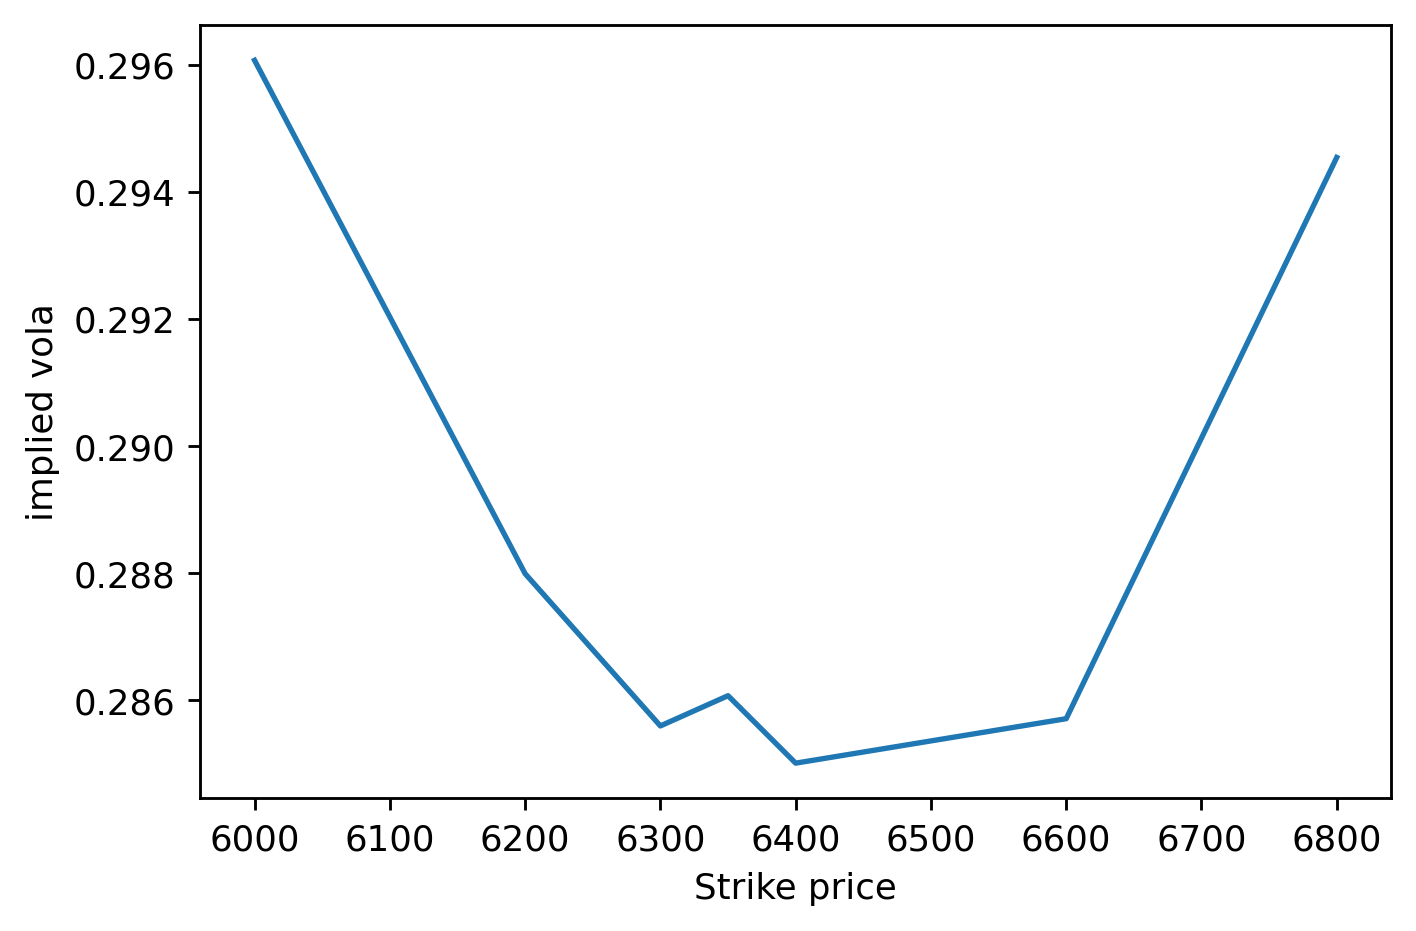

In [39]:
plt.figure(dpi=256)
plt.plot(K_list, impl_vols)
plt.xlabel("Strike price")
plt.ylabel("implied vola")